<a href="https://colab.research.google.com/github/Rosangela-Gallo/Rosangela-Gallo/blob/main/Analise_imoveis_de_aluguel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


                          Projeto Aprimoramento   -   Curso Engenheiro de Dados    -    Soulcode Academy



**Nivel Pandas**       
O arquivo que estiver em outra linguagem deverá ter seus dados traduzidos para Português-BR
Realizar a extração corretamente para um dataframe
Verificar a existência de dados inconsistentes e realizar a limpeza para NaN ou NA
Realizar o drop(se necessário) de colunas do dataframe
Todos os passos devem ser comentados
Criar pelo menos uma plotagem







*Insights  iniciais* >>> 
1 - Alguém que vai utilizar este serviço, necessita saber se o imóvel está disponível pelo tempo que ela deseja, quanto vai custar e onde estão estes imóveis.
2 - Supondo que os com maior numero de avaliaçoes são os mais procurados - vamos
verificar a quantidade de imóveis que cada anfitrião possui e se estas avaliações estão ligadas a isso, ou ao preço, ou á localização.

*Instalação das Bibliotecas necessárias* 

In [ ]:
pip install pandas

In [ ]:
# instalei a biblioteca esta biblioteca para realizar traduçoes em massa (versão Beta)
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 4.4 MB/s 
     |████████████████████████████████| 42 kB 761 kB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 1.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=2411bf6df126574c380363ebb75244e681d6cb3f703cb336fb2fa3169a47c3ad
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


importando a biblioteca pandas, googletrans e definindo variáveis

In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator
tradutor = Translator(service_urls = ['translate.googleapis.com'])

In [ ]:
#importando bibliotecas para a conecção com o GCP e definindo variáveis
from google.colab import auth
project_id = "ingest-wallace"   # conta compartilhada
bucket_name = "appspot.com"
!gcloud config set project {project_id}

Updated property [core/project].


Fiz a leitura do arquivo disponibilizado no Classroom como    "4.csv"  para um dataframe

In [ ]:
df_pandas = pd.read_xlsx("/content/gdrive/MyDrive/Projeto_Aprimoramento/4.csv")



Salvei o arquivo Bruto "4.csv" direto no bucket - Cloud Storage

In [ ]:
#Autenticando conta do usuário
auth.authenticate_user()

In [ ]:
#salvando GCP
!gsutil cp /content/4.csv gs://ingest-wallace.appspot.com/Entrada_Aprimoramento/4.csv

CommandException: No URLs matched: /content/4.csv


Passo a carregar o arquivo diretamente do Bucket

In [ ]:
!gsutil cp gs://ingest-wallace.appspot.com/Entrada_Aprimoramento/4.csv /content/4.csv

Copying gs://ingest-wallace.appspot.com/Entrada_Aprimoramento/4.csv...
- [1 files][  5.0 MiB/  5.0 MiB]                                                
Operation completed over 1 objects/5.0 MiB.                                      


In [ ]:
# Faço a leitura do arquivo que veio da Bucket num dataframe
df_pandas = pd.read_csv("/content/4.csv")

Mostra o conteúdo inicial do arquivo ainda bruto

In [ ]:
df_pandas.head(4)

In [ ]:
# Verificar como os  campos estão definidos
df_pandas.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

Criei um df backup para garantir a segurança dos dados

In [ ]:
df_backup = df_pandas
df_backup.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0


In [ ]:
df_pandas.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

O comando abaixo mostra uma descrição geral dos dados do dataframe

In [ ]:
df_pandas.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,3.633400e+04,36318,3.633400e+04,36313,36333,36333,36333.000000,36333.000000,36333,36333.000000,36333.000000,36333.000000,30532,30532.000000,36333.000000,36333.000000
unique,NaN,35671,NaN,9273,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,328,15928,3097,NaN,NaN,19014,NaN,NaN,NaN,993,NaN,NaN,NaN
mean,1.422079e+07,NaN,4.471385e+07,NaN,NaN,NaN,40.728640,-73.953169,NaN,147.358022,6.905651,29.448793,NaN,1.142241,3.941761,101.593427
std,8.427656e+06,NaN,5.381382e+07,NaN,NaN,NaN,0.054364,0.044079,NaN,230.736064,21.098663,49.930208,NaN,1.480552,13.425832,129.733033
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.242850,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,6.967039e+06,NaN,5.905590e+06,NaN,NaN,NaN,40.689100,-73.982400,NaN,69.000000,2.000000,1.000000,NaN,0.140000,1.000000,0.000000
50%,1.421927e+07,NaN,2.213123e+07,NaN,NaN,NaN,40.722280,-73.955970,NaN,105.000000,3.000000,8.000000,NaN,0.490000,1.000000,18.000000
75%,2.152909e+07,NaN,6.139196e+07,NaN,NaN,NaN,40.763490,-73.938240,NaN,170.000000,5.000000,35.000000,NaN,1.660000,2.000000,201.000000


In [ ]:
df_pandas.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36328,28910248,"❤️ Private Studio+Bath+Balcony, 15 mins to City",217844544,Mia,Brooklyn,Bushwick,40.69454,-73.92612,Private room,90.0,2.0,54.0,2019-07-07,5.79,2.0,118.0
36329,28910899,"Private room in large, central Nolita penthouse!",153154549,Sarah,Manhattan,Nolita,40.72135,-73.99426,Private room,140.0,3.0,2.0,2018-10-15,0.22,1.0,0.0
36330,28910978,Artistic house with murals,52044518,Veronica,Queens,East Elmhurst,40.76173,-73.87417,Private room,65.0,1.0,58.0,2019-07-08,6.19,1.0,47.0
36331,28911697,Cozy Artist Room,70230403,Sonya,Brooklyn,Bushwick,40.69677,-73.92688,Private room,57.0,1.0,1.0,2018-10-22,0.12,1.0,0.0


# INICIO DA MANIPULAÇÃO DOS DADOS


# **TRADUÇÕES DO INGLÊS PARA PT-BR**

Iniciei renomeando as colunas para nomes traduzidos para o português (PT-BR) - isso torna mais fácil a familiarização com o conteúdo das colunas

In [ ]:
df_pandas = df_pandas.rename({"name":"nome","host_id":"id_anfitriao","host_name":"nome_anfitriao","neighbourhood_group":"grupo_bairro","neighbourhood":"bairro","latitude ":"latitude ","longitude":"longitude","room_type":"tipo_de_quarto","price":"preco","minimum_nights":"minimo_de_noites","number_of_reviews":"numero_de_avaliacoes","last_review":"ultima_avaliacao","reviews_per_month":"Qtde_avaliacoes_mes","calculated_host_listings_count":"soma_propriedades_anfitriao","availability_365":"disponibilidade_365"}, axis='columns')
df_pandas.head(4)

,id,nome,id_anfitriao,nome_anfitriao,grupo_bairro,bairro,latitude,longitude,tipo_de_quarto,preco,minimo_de_noites,numero_de_avaliacoes,ultima_avaliacao,Qtde_avaliacoes_mes,soma_propriedades_anfitriao,disponibilidade_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0




Busquei de forma única os tipos de acomodações oferecidas.
Depois fiz a tradução do conteúdo para PT-BR na coluna tipo_de_quarto

In [ ]:
#df_pandas.unique(df_pandas['tipo_de_quarto'])

In [ ]:
# tradução dos dados de tipo de quarto
df_pandas.tipo_de_quarto.replace(['Entire home/apt'], ['Casa / apto inteiro'], inplace = True)
df_pandas.tipo_de_quarto.replace(['Private room'], ['Sala privada'], inplace = True)
df_pandas.tipo_de_quarto.replace(['Shared room'], ['Quarto compartilhado'], inplace = True)

In [ ]:
#Estes campos vazios foram dropados porque os dados 
#perdem o sentido sem a informação do objeto principal
df_pandas.dropna(subset=['nome'],inplace=True)

In [ ]:
'''
# utilizei a função lambda junto com googletranslate para traduzir os textos da coluna nome. Deixo comentada
porque leva horas pra concluir o processo
df_pandas['nome_ptbr'] = df_pandas['nome'].apply(lambda x: tradutor.translate(x, src='en', dest='pt').text)
df_pandas['nome_ptbr']
'''

"\n# utilizei a função lambda junto com googletranslate para traduzir os textos da coluna nome. Deixo comentada\nporque leva horas pra concluir o processo\ndf_pandas['nome_ptbr'] = df_pandas['nome'].apply(lambda x: tradutor.translate(x, src='en', dest='pt').text)\ndf_pandas['nome_ptbr']\n"

In [ ]:
#salvei a tradução num arquivo csv e já enviei para o Bucket porque a função acima levou cerca de 5 horas para ficar pronta
#df_pandas.to_csv("4_pt_br.csv", index=False)
#!gsutil cp /content/4_pt_br.csv gs://ingest-wallace.appspot.com/Entrada_Aprimoramento/4_pt_br.csv

Releitura do arquivo agora traduzido para PT-BR  


In [ ]:
#Trago o arquivo traduzido que foi salvo no GCP e leio num dataframe
!gsutil cp gs://ingest-wallace.appspot.com/Entrada_Aprimoramento/4_pt_br.csv /content/4_pt_br.csv
df4_traduzido = pd.read_csv('/content/4_pt_br.csv')

Copying gs://ingest-wallace.appspot.com/Entrada_Aprimoramento/4_pt_br.csv...
- [1 files][  9.7 MiB/  9.7 MiB]                                                
Operation completed over 1 objects/9.7 MiB.                                      


In [ ]:
# mostra o arquivo gerado ainda com a coluna nome em ingles e outra em portugues no final
df4_traduzido

,id,nome,id_anfitriao,nome_anfitriao,grupo_bairro,bairro,latitude,longitude,tipo_de_quarto,preco,minimo_de_noites,numero_de_avaliacoes,ultima_avaliacao,Qtde_avaliacoes_mes,soma_propriedades_anfitriao,disponibilidade_365,nome_ptbr
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,"4,064749E+016",-7.397237e+06,Sala privada,149,1,9,2018-10-19,0.21,6,365,Limpo e tranquilo apto casa pelo parque
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,4075362,-7.398377e+15,Casa / apto inteiro,225,1,45,2019-05-21,0.38,2,355,Castelo de Skylit Midtown.
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,"4,080902E+016",-7.394190e+05,Sala privada,150,3,0,NaN,NaN,1,365,A aldeia de Harlem . Nova York!
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,"4,068514E+016",-7.395976e+06,Casa / apto inteiro,89,1,270,2019-07-05,4.64,1,194,Aconchegante inteiro de quartoownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,4079851,-7.394399e+06,Casa / apto inteiro,80,10,9,2018-11-19,0.10,1,0,Inteiro aptoo: estúdio espaçoso loft pelo Cen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4067853,-7.394995e+06,Sala privada,70,2,0,NaN,NaN,2,9,Encantador um quarto - Rowhouse recentemente r...
48875,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,"4,070184E+016",-7.393317e+15,Sala privada,40,4,0,NaN,NaN,2,36,Quarto Acessível em Bushwick East Williamsburg
48876,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,4081475,-7.394867e+15,Casa / apto inteiro,115,10,0,NaN,NaN,1,27,Estúdio ensolarado na vizinhança histórica
48877,36485609,43rd St. Time Square cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,"4,07575099999999E+016",-7.399112e+06,Quarto compartilhado,55,1,0,NaN,NaN,6,2,43rd St. Time Square Aconchegante Solteiro Cama


In [ ]:
# a tradução manteve a coluna "nome" original e criou mais uma coluna que nomeei "nome_ptbr"
# por isso nesta celula  o campo nome recebe nome_ptbr e em seguida o campo nome_ptbr é deletado
df4_traduzido['nome'] = df4_traduzido['nome_ptbr']
df4_traduzido.drop(['nome_ptbr'], axis=1, inplace=True)

In [ ]:
# mostra como ficou o dataframe
df4_traduzido

,id,nome,id_anfitriao,nome_anfitriao,grupo_bairro,bairro,latitude,longitude,tipo_de_quarto,preco,minimo_de_noites,numero_de_avaliacoes,ultima_avaliacao,Qtde_avaliacoes_mes,soma_propriedades_anfitriao,disponibilidade_365
0,2539,Limpo e tranquilo apto casa pelo parque,2787,John,Brooklyn,Kensington,"4,064749E+016",-7.397237e+06,Sala privada,149,1,9,2018-10-19,0.21,6,365
1,2595,Castelo de Skylit Midtown.,2845,Jennifer,Manhattan,Midtown,4075362,-7.398377e+15,Casa / apto inteiro,225,1,45,2019-05-21,0.38,2,355
2,3647,A aldeia de Harlem . Nova York!,4632,Elisabeth,Manhattan,Harlem,"4,080902E+016",-7.394190e+05,Sala privada,150,3,0,NaN,NaN,1,365
3,3831,Aconchegante inteiro de quartoownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,"4,068514E+016",-7.395976e+06,Casa / apto inteiro,89,1,270,2019-07-05,4.64,1,194
4,5022,Inteiro aptoo: estúdio espaçoso loft pelo Cen...,7192,Laura,Manhattan,East Harlem,4079851,-7.394399e+06,Casa / apto inteiro,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Encantador um quarto - Rowhouse recentemente r...,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,4067853,-7.394995e+06,Sala privada,70,2,0,NaN,NaN,2,9
48875,36485057,Quarto Acessível em Bushwick East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,"4,070184E+016",-7.393317e+15,Sala privada,40,4,0,NaN,NaN,2,36
48876,36485431,Estúdio ensolarado na vizinhança histórica,23492952,Ilgar & Aysel,Manhattan,Harlem,4081475,-7.394867e+15,Casa / apto inteiro,115,10,0,NaN,NaN,1,27
48877,36485609,43rd St. Time Square Aconchegante Solteiro Cama,30985759,Taz,Manhattan,Hell's Kitchen,"4,07575099999999E+016",-7.399112e+06,Quarto compartilhado,55,1,0,NaN,NaN,6,2


# Tratamento dos NaN

In [ ]:
#encontra e soma os campos que estão sem preenchimento em cada  coluna do  DF
df4_traduzido.isna().sum()

id                                 0
nome                               4
id_anfitriao                       0
nome_anfitriao                    21
grupo_bairro                       0
bairro                             0
latitude                           0
longitude                          0
tipo_de_quarto                     0
preco                              0
minimo_de_noites                   0
numero_de_avaliacoes               0
ultima_avaliacao               10042
Qtde_avaliacoes_mes            10042
soma_propriedades_anfitriao        0
disponibilidade_365                0
dtype: int64

In [ ]:
# Os campos com valores em branco foram preenchidos com valores que não prejudicam o dataset para esta análise.
df4_traduzido.nome_anfitriao.fillna("Anônimo", inplace=True)
df4_traduzido.Qtde_avaliacoes_mes.fillna("0", inplace=True)
df4_traduzido.ultima_avaliacao.fillna("1980-01-01", inplace=True)

In [ ]:
df_pandas.fillna("0", inplace=True)

Tradução dos dados da *coluna nome*

In [ ]:
# Durante o processo de tradução foram encontradas inconsistências que serão tratadas aqui como na.
df4_traduzido.replace(['.', ',', '1', '2', '/', '#','2.','3.',"",' ','""'], pd.NA, inplace=True)
df4_traduzido.dropna(subset=['nome'],inplace=True)

In [ ]:
# Verificação de que não ha mais Na
df4_traduzido.isna().sum()

id                             0
nome                           0
id_anfitriao                   0
nome_anfitriao                 0
grupo_bairro                   0
bairro                         0
latitude                       0
longitude                      0
tipo_de_quarto                 0
preco                          0
minimo_de_noites               0
numero_de_avaliacoes           0
ultima_avaliacao               0
Qtde_avaliacoes_mes            0
soma_propriedades_anfitriao    0
disponibilidade_365            0
dtype: int64

Dropei as colunas latitude e longitude por não serem relevantes para esta análise

In [ ]:
df4_traduzido.drop(['latitude'], axis=1, inplace=True)
df4_traduzido.drop(['longitude'], axis=1, inplace=True)

In [ ]:
df4_traduzido.head()

,id,nome,id_anfitriao,nome_anfitriao,grupo_bairro,bairro,tipo_de_quarto,preco,minimo_de_noites,numero_de_avaliacoes,ultima_avaliacao,Qtde_avaliacoes_mes,soma_propriedades_anfitriao,disponibilidade_365
0,2539,Limpo e tranquilo apto casa pelo parque,2787,John,Brooklyn,Kensington,Sala privada,149,1,9,2018-10-19,0.21,6,365
1,2595,Castelo de Skylit Midtown.,2845,Jennifer,Manhattan,Midtown,Casa / apto inteiro,225,1,45,2019-05-21,0.38,2,355
2,3647,A aldeia de Harlem . Nova York!,4632,Elisabeth,Manhattan,Harlem,Sala privada,150,3,0,1980-01-01,0,1,365
3,3831,Aconchegante inteiro de quartoownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Casa / apto inteiro,89,1,270,2019-07-05,4.64,1,194
4,5022,Inteiro aptoo: estúdio espaçoso loft pelo Cen...,7192,Laura,Manhattan,East Harlem,Casa / apto inteiro,80,10,9,2018-11-19,0.1,1,0


In [ ]:
#também foram dropados registros onde a disponibilidade no ano ou o preço era igual a 0 (zero)
df4_traduzido = df4_traduzido.drop(df4_traduzido[df4_traduzido.disponibilidade_365 == 0].index)
df4_traduzido = df4_traduzido.drop(df4_traduzido[df4_traduzido.preco == 0].index)

Verifiquei que não são permitidos campos nulos em nenhuma coluna

In [ ]:
df4_traduzido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31347 entries, 0 to 48878
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           31347 non-null  int64 
 1   nome                         31347 non-null  object
 2   id_anfitriao                 31347 non-null  int64 
 3   nome_anfitriao               31347 non-null  object
 4   grupo_bairro                 31347 non-null  object
 5   bairro                       31347 non-null  object
 6   tipo_de_quarto               31347 non-null  object
 7   preco                        31347 non-null  int64 
 8   minimo_de_noites             31347 non-null  int64 
 9   numero_de_avaliacoes         31347 non-null  int64 
 10  ultima_avaliacao             31347 non-null  object
 11  Qtde_avaliacoes_mes          31347 non-null  object
 12  soma_propriedades_anfitriao  31347 non-null  int64 
 13  disponibilidade_365          31

In [ ]:
#Alterando os tipos das colunas
df4_traduzido = df4_traduzido.astype({"id": int,"nome": object,"id_anfitriao": int,"nome_anfitriao": object,"grupo_bairro": object,"bairro": object,
                                      "tipo_de_quarto": object,"preco": float,"minimo_de_noites": int,"numero_de_avaliacoes": int,"ultima_avaliacao": object,"Qtde_avaliacoes_mes": int,"soma_propriedades_anfitriao": int,
"disponibilidade_365": int})

In [ ]:
df4_traduzido

,id,nome,id_anfitriao,nome_anfitriao,grupo_bairro,bairro,tipo_de_quarto,preco,minimo_de_noites,numero_de_avaliacoes,ultima_avaliacao,Qtde_avaliacoes_mes,soma_propriedades_anfitriao,disponibilidade_365
0,2539,Limpo e tranquilo apto casa pelo parque,2787,John,Brooklyn,Kensington,Sala privada,149.0,1,9,2018-10-19,0,6,365
1,2595,Castelo de Skylit Midtown.,2845,Jennifer,Manhattan,Midtown,Casa / apto inteiro,225.0,1,45,2019-05-21,0,2,355
2,3647,A aldeia de Harlem . Nova York!,4632,Elisabeth,Manhattan,Harlem,Sala privada,150.0,3,0,1980-01-01,0,1,365
3,3831,Aconchegante inteiro de quartoownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Casa / apto inteiro,89.0,1,270,2019-07-05,4,1,194
5,5099,Grande apartamento aconchegante 1 quarto em Mi...,7322,Chris,Manhattan,Murray Hill,Casa / apto inteiro,200.0,3,74,2019-06-22,0,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Encantador um quarto - Rowhouse recentemente r...,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Sala privada,70.0,2,0,1980-01-01,0,2,9
48875,36485057,Quarto Acessível em Bushwick East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Sala privada,40.0,4,0,1980-01-01,0,2,36
48876,36485431,Estúdio ensolarado na vizinhança histórica,23492952,Ilgar & Aysel,Manhattan,Harlem,Casa / apto inteiro,115.0,10,0,1980-01-01,0,1,27
48877,36485609,43rd St. Time Square Aconchegante Solteiro Cama,30985759,Taz,Manhattan,Hell's Kitchen,Quarto compartilhado,55.0,1,0,1980-01-01,0,6,2


In [ ]:
#verifico se ainda temos nulos
#df.isnull()
df4_traduzido.isnull().sum()

id                             0
nome                           0
id_anfitriao                   0
nome_anfitriao                 0
grupo_bairro                   0
bairro                         0
tipo_de_quarto                 0
preco                          0
minimo_de_noites               0
numero_de_avaliacoes           0
ultima_avaliacao               0
Qtde_avaliacoes_mes            0
soma_propriedades_anfitriao    0
disponibilidade_365            0
dtype: int64

# Algumas consultas
Quanto um anuncio consegue atingir dependendo do grupo escolhido

In [ ]:
# quantos bairros em cada grupo
df4_traduzido.groupby(["grupo_bairro"]).bairro.count()

grupo_bairro
Bronx              911
Brooklyn         12252
Manhattan        13556
Queens            4297
Staten Island      331
Name: bairro, dtype: int64

# **PLOTAGEM COM PANDAS -**  da quantidade de bairros que um anuncio consegue atender dependendo do grupo escolhido
****No gráfico abaixo, observa-se que a maioria dos bairros está ligada ao grupo Manhattam
****Assim o anúncio  de uma acomodação no grupo Manhattam vai atingir mais pessoas

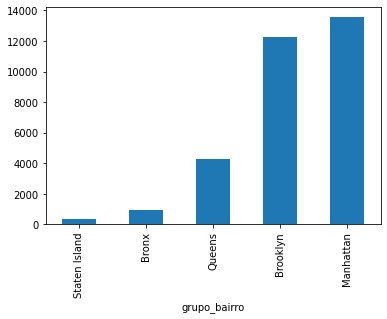

In [ ]:
df4_traduzido.groupby(["grupo_bairro"]).bairro.count().sort_values()[-5:].plot(kind='bar')

O código abaixo identifica os valores minimos e máximo de preço em cada bairro

In [ ]:
df3 = df4_traduzido.groupby(['grupo_bairro','bairro'])['preco'].max().sort_values(ascending=False)
df3

grupo_bairro   bairro         
Manhattan      Upper West Side    10000.0
               Lower East Side     9999.0
               Tribeca             8500.0
Brooklyn       Clinton Hill        8000.0
Manhattan      Upper East Side     7703.0
                                   ...   
Staten Island  Richmondtown          78.0
               Rossville             75.0
Bronx          Hunts Point           70.0
               Mount Eden            55.0
Staten Island  Port Richmond         55.0
Name: preco, Length: 218, dtype: float64

In [ ]:
df4 = df4_traduzido.groupby(['grupo_bairro','bairro','preco'])['preco'].min().sort_values(ascending=True)
df4

grupo_bairro  bairro           preco  
Brooklyn      Greenpoint       10.0          10.0
Bronx         Highbridge       10.0          10.0
Brooklyn      Sunset Park      10.0          10.0
Manhattan     East Village     10.0          10.0
              Kips Bay         10.0          10.0
                                           ...   
              Upper East Side  7703.0      7703.0
Brooklyn      Clinton Hill     8000.0      8000.0
Manhattan     Tribeca          8500.0      8500.0
              Lower East Side  9999.0      9999.0
              Upper West Side  10000.0    10000.0
Name: preco, Length: 9437, dtype: float64

In [ ]:

print(df4_traduzido['preco'].describe())

count    31347.000000
mean       162.095288
std        254.467118
min         10.000000
25%         70.000000
50%        112.000000
75%        189.000000
max      10000.000000
Name: preco, dtype: float64


In [ ]:
# Calculada a média geral de preços
media_geral = df4_traduzido['preco'].mean()
print(media_geral)

162.09528822534853


# **PLOTAGEM COM PANDAS -** os bairros que disponibilizam mais imóveis

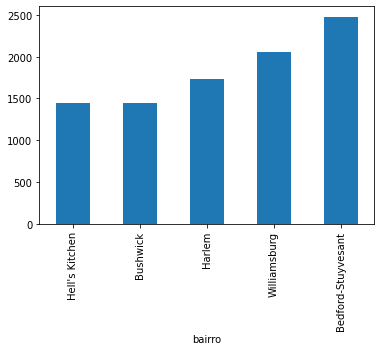

In [ ]:
df4_traduzido.groupby(['bairro']).nome.count().sort_values()[-5:].plot(kind='bar')

# `Salvando os arquivos`

In [ ]:
df4_traduzido

,id,nome,id_anfitriao,nome_anfitriao,grupo_bairro,bairro,tipo_de_quarto,preco,minimo_de_noites,numero_de_avaliacoes,ultima_avaliacao,Qtde_avaliacoes_mes,soma_propriedades_anfitriao,disponibilidade_365
0,2539,Limpo e tranquilo apto casa pelo parque,2787,John,Brooklyn,Kensington,Sala privada,149.0,1,9,2018-10-19,0,6,365
1,2595,Castelo de Skylit Midtown.,2845,Jennifer,Manhattan,Midtown,Casa / apto inteiro,225.0,1,45,2019-05-21,0,2,355
2,3647,A aldeia de Harlem . Nova York!,4632,Elisabeth,Manhattan,Harlem,Sala privada,150.0,3,0,1980-01-01,0,1,365
3,3831,Aconchegante inteiro de quartoownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Casa / apto inteiro,89.0,1,270,2019-07-05,4,1,194
5,5099,Grande apartamento aconchegante 1 quarto em Mi...,7322,Chris,Manhattan,Murray Hill,Casa / apto inteiro,200.0,3,74,2019-06-22,0,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Encantador um quarto - Rowhouse recentemente r...,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Sala privada,70.0,2,0,1980-01-01,0,2,9
48875,36485057,Quarto Acessível em Bushwick East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Sala privada,40.0,4,0,1980-01-01,0,2,36
48876,36485431,Estúdio ensolarado na vizinhança histórica,23492952,Ilgar & Aysel,Manhattan,Harlem,Casa / apto inteiro,115.0,10,0,1980-01-01,0,1,27
48877,36485609,43rd St. Time Square Aconchegante Solteiro Cama,30985759,Taz,Manhattan,Hell's Kitchen,Quarto compartilhado,55.0,1,0,1980-01-01,0,6,2


salvando arquivo pandas com tratamento de limpeza no drive



In [ ]:
df4_traduzido.to_csv("4_tratado.csv", index=False)


--------------------------------------------------------------------------------

# **PYSPARK**

**Nivel PySpark** 
(Funções básicas vistas em aula)
Deverá ser montada a estrutura do DataFrame utilizando o StructType
Realizar a mudança de nome de pelo menos 2 colunas
Deverá criar pelo menos uma nova coluna contendo alguma informação relevante sobre as outras colunas já existentes(Use a sua capacidade analítica)
Deverá utilizar as funções: where, filter, orderBy, groupBy, when - otherWise, sum e avg.
Utilizar pelo menos uma Window Functions
Exportar o arquivo final



Instalação das bibliotecas necessárias

In [ ]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 38 kB/s 
     |████████████████████████████████| 198 kB 54.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=53fbc91eaf23ae32827ea24f908ff5baaa853cd1681756173d1ab4ce6a0d4638
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
# Importando as bibliotecas e tipos para as variáveis
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
from pyspark.sql.window import Window as w
from pyspark.sql.functions import rank, dense_rank
import numpy as np


In [ ]:
# Criando uma sessão para o SPARK
spark = (
    SparkSession.builder
      .master('local')
      .appName('aprimoramento_1')
      .config('spark.ui.port', '4050')
      .getOrCreate()
)

In [ ]:
spark

In [ ]:
# Definindo os tipos de dados e a ordem do cabeçalho
esquema = StructType([ 
      StructField("id",IntegerType(),False),
      StructField("nome",StringType(),False),
      StructField("id_anfitriao",IntegerType(),False),
      StructField("nome_anfitriao",StringType(),False),
      StructField("grupo_bairro",StringType(),False),
      StructField("bairro",StringType(),False),
      StructField("tipo_de_quarto",StringType(),False),
      StructField("preco",DoubleType(),False),
      StructField("minimo_de_noites",IntegerType(),False),
      StructField("numero_de_avaliacoes",StringType(),False),
      StructField("ultima_avaliacao",StringType(),False),
      StructField("quantidade_avaliacoes",IntegerType(),False),
      StructField("soma_propriedades_anfitriao",StringType(),False),
      StructField("disponibilidade_365",IntegerType(),False)
])
# Importando o CSV tratado no Pyspark
local= ("/content/4_tratado.csv")
df_pyspark = spark.read.load(local, format="csv", header="True", sep=',', schema=esquema)


In [ ]:
df_pyspark.printSchema()
df_pyspark.show()

root
 |-- id: integer (nullable = true)
 |-- nome: string (nullable = true)
 |-- id_anfitriao: integer (nullable = true)
 |-- nome_anfitriao: string (nullable = true)
 |-- grupo_bairro: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- tipo_de_quarto: string (nullable = true)
 |-- preco: double (nullable = true)
 |-- minimo_de_noites: integer (nullable = true)
 |-- numero_de_avaliacoes: string (nullable = true)
 |-- ultima_avaliacao: string (nullable = true)
 |-- quantidade_avaliacoes: integer (nullable = true)
 |-- soma_propriedades_anfitriao: string (nullable = true)
 |-- disponibilidade_365: integer (nullable = true)

+----+--------------------+------------+----------------+------------+------------------+-------------------+-----+----------------+--------------------+----------------+---------------------+---------------------------+-------------------+
|  id|                nome|id_anfitriao|  nome_anfitriao|grupo_bairro|            bairro|     tipo_de_quarto|pre

In [ ]:
# faz uma seleção apenas dos que têm pelo menos um imóvel
#df_pyspark = df_pyspark[df_pyspark['soma_propriedades_anfitriao'] != '0'].show()

In [ ]:
# RENOMEANDO COLUNAS
df_pyspark = df_pyspark.withColumnRenamed("nome", "anuncio")
df_pyspark = df_pyspark.withColumnRenamed("numero_de_avaliacoes", "total_avaliacoes")
df_pyspark = df_pyspark.withColumnRenamed("quantidade_avaliacoes", "avaliacoes_mes")
df_pyspark.show()

+----+--------------------+------------+----------------+------------+------------------+-------------------+-----+----------------+----------------+----------------+--------------+---------------------------+-------------------+
|  id|             anuncio|id_anfitriao|  nome_anfitriao|grupo_bairro|            bairro|     tipo_de_quarto|preco|minimo_de_noites|total_avaliacoes|ultima_avaliacao|avaliacoes_mes|soma_propriedades_anfitriao|disponibilidade_365|
+----+--------------------+------------+----------------+------------+------------------+-------------------+-----+----------------+----------------+----------------+--------------+---------------------------+-------------------+
|2539|Limpo e tranquilo...|        2787|            John|    Brooklyn|        Kensington|       Sala privada|149.0|               1|               9|      2018-10-19|             0|                          6|                365|
|2595|Castelo de Skylit...|        2845|        Jennifer|   Manhattan|          

O código abaixo verifica os preços médio, minimo e máximo dos quartos por bairro onde está disponível.:

In [ ]:
# utilizei a função agg para nomear as colunas calculadas com as funções
df_mediabairro = df_pyspark.groupBy(F.col("bairro")).agg(
            F.max("preco").alias("max_preco"),
            F.min("preco").alias("min_preco"),
            F.avg("preco").alias("media_preco"),        
)
df_mediabairro.show()

+------------------+---------+---------+------------------+
|            bairro|max_preco|min_preco|       media_preco|
+------------------+---------+---------+------------------+
|            Corona|    359.0|     23.0|58.725806451612904|
|      Richmondtown|     78.0|     78.0|              78.0|
|      Prince's Bay|   1250.0|     85.0| 484.3333333333333|
|       Westerleigh|    103.0|     40.0|              71.5|
|        Mill Basin|    299.0|     85.0|            179.75|
|      Civic Center|    950.0|     75.0|             236.0|
|        Douglaston|    178.0|     40.0|             82.75|
|        Mount Hope|    250.0|     30.0|            85.375|
|       Marble Hill|    274.0|     40.0|110.66666666666667|
|         Rego Park|    300.0|     30.0| 91.52941176470588|
|     Dyker Heights|    170.0|     30.0|              97.7|
| Kew Gardens Hills|    399.0|     40.0|124.26315789473684|
|      Dongan Hills|     95.0|     37.0| 66.83333333333333|
|Financial District|   3000.0|     52.0|

In [ ]:
# com os comandos when , otherwise e whithcolumn
# Esta celula de código cria uma coluna que identifica quais os estabelecimentos mais caros e mais baratos por bairro
# A média geral de preços é 161.40 então, os mais baratos estão abaixo desta média e os mais caros acima dela.(acima da média e abaixo da média)
df_mediabairro = (
df_mediabairro.withColumn('classifica_preco', F.when(df_mediabairro['media_preco'] > 162.09, 'Acima da Media').otherwise('Abaixo da Media')))
# seleciono duas casas decimais e ordeno a média de preço por bairro em ordem decrescente de valor
df_mediabairro = df_mediabairro[df_mediabairro['bairro']!='2'].withColumn("media_preco", F.round(df_mediabairro["media_preco"])
).orderBy(F.col('media_preco').desc()).show(100)

+--------------------+---------+---------+-----------+----------------+
|              bairro|max_preco|min_preco|media_preco|classifica_preco|
+--------------------+---------+---------+-----------+----------------+
|      Fort Wadsworth|    800.0|    800.0|      800.0|  Acima da Media|
|            Sea Gate|   1485.0|     99.0|      570.0|  Acima da Media|
|           Riverdale|   2500.0|     49.0|      567.0|  Acima da Media|
|             Tribeca|   8500.0|     80.0|      561.0|  Acima da Media|
|   Battery Park City|   7500.0|     55.0|      515.0|  Acima da Media|
|        Prince's Bay|   1250.0|     85.0|      484.0|  Acima da Media|
|   Flatiron District|   1750.0|     95.0|      382.0|  Acima da Media|
|       Randall Manor|   5000.0|     13.0|      336.0|  Acima da Media|
|                NoHo|   1795.0|     80.0|      331.0|  Acima da Media|
|                SoHo|   3000.0|     64.0|      320.0|  Acima da Media|
|             Midtown|   5100.0|     50.0|      302.0|  Acima da




**Com esta análise na célula abaixo, verifiquei que alguns diferentes proprietários possuem o mesmo tipo e a mesma quantidade de quartos/salas, mas o número de avaliações recebidas é muito diferente.**(tendo o mesmo tipo de quarto e a mensma quantidade de imóveis, um tem 0 avaliações e outro mais de 500 avaliaçoes e outros com muitos imóveis também não têm avaliações)





In [ ]:
df_propriedade = df_pyspark.groupBy(F.col("id_anfitriao"),F.col("nome_anfitriao"),F.col("tipo_de_quarto"),F.col("total_avaliacoes")).agg(
    F.sum("soma_propriedades_anfitriao").alias("total_de_propriedades")).orderBy(F.col('total_avaliacoes').desc()).show()

+------------+-------------------+--------------------+----------------+---------------------+
|id_anfitriao|     nome_anfitriao|      tipo_de_quarto|total_avaliacoes|total_de_propriedades|
+------------+-------------------+--------------------+----------------+---------------------+
|     5532810|              Sandy|        Sala privada|              99|                  2.0|
|    31304940|               John|        Sala privada|              99|                 16.0|
|    78164397|               Mike|        Sala privada|              99|                  1.0|
|   151146788|              Rohit| Casa / apto inteiro|              99|                  2.0|
|    24982374|              David| Casa / apto inteiro|              99|                  1.0|
|    12342828|              Marco|        Sala privada|              99|                  2.0|
|    45416627|             Lolita|        Sala privada|              99|                  9.0|
|    20243795|               Tony|        Sala pri

In [ ]:
'''
# windowFunction - particionando o datarame por tipo de quarto e criando um ranking
w1 = w.partitionBy(F.col('tipo_de_quarto')).orderBy(F.col('total_avaliacoes').desc())
df_propriedade.groupby(F.col('tipo_de_quarto')).count()
df_propriedade.withColumn('dense_rank', F.dense_rank().over(w1)).show()
'''

"\n# windowFunction - particionando o datarame por tipo de quarto e criando um ranking\nw1 = w.partitionBy(F.col('tipo_de_quarto')).orderBy(F.col('total_avaliacoes').desc())\ndf_propriedade.groupby(F.col('tipo_de_quarto')).count()\ndf_propriedade.withColumn('dense_rank', F.dense_rank().over(w1)).show()\n"

Já nesta outra análise, verifica-se que a quantidade de avaliações está diretamente ligada aos locais onde são disponibilizadas, sendo que os maiores números de avaliações estão em Manhattan ou no Brooklyn

In [ ]:
# Apenas os registros que tiveram a partir de 100 avaliações no ano
df_avaliacao = df_pyspark.select(F.col("nome_anfitriao"),F.col("soma_propriedades_anfitriao"),F.col("total_avaliacoes"),F.col("grupo_bairro")).filter("total_avaliacoes > 100" )
df_avaliacao.show()


+---------------+---------------------------+----------------+------------+
| nome_anfitriao|soma_propriedades_anfitriao|total_avaliacoes|grupo_bairro|
+---------------+---------------------------+----------------+------------+
|    LisaRoxanne|                          1|             270|    Brooklyn|
|       Shunichi|                          1|             430|   Manhattan|
|            Ben|                          4|             160|   Manhattan|
|           Kate|                          1|             188|   Manhattan|
|         Laurie|                          3|             167|    Brooklyn|
|        Claudio|                          1|             113|   Manhattan|
|  Allen & Irina|                          1|             148|    Brooklyn|
|           Jane|                          1|             198|    Brooklyn|
|           Doti|                          1|             260|   Manhattan|
|          Lisel|                          6|             130|    Brooklyn|
|           



A consulta abaixo determina os imóveis que estão disponíveis por  6 meses ou um ano, caso a pessoa necessite do imóvel por um periodo maior. e podemos ver que são do tipo apartamento inteiro ou sala privada.



In [ ]:
#  com a função where verifico apenas os imóveis que têm disponibilidade de 6 meses ou 1 ano
from pyspark.sql.functions import col

df_pyspark.where(col("disponibilidade_365").isin({"365" , "183"})).count()
df_pyspark.show()

+----+--------------------+------------+----------------+------------+------------------+-------------------+-----+----------------+----------------+----------------+--------------+---------------------------+-------------------+
|  id|             anuncio|id_anfitriao|  nome_anfitriao|grupo_bairro|            bairro|     tipo_de_quarto|preco|minimo_de_noites|total_avaliacoes|ultima_avaliacao|avaliacoes_mes|soma_propriedades_anfitriao|disponibilidade_365|
+----+--------------------+------------+----------------+------------+------------------+-------------------+-----+----------------+----------------+----------------+--------------+---------------------------+-------------------+
|2539|Limpo e tranquilo...|        2787|            John|    Brooklyn|        Kensington|       Sala privada|149.0|               1|               9|      2018-10-19|             0|                          6|                365|
|2595|Castelo de Skylit...|        2845|        Jennifer|   Manhattan|          

Partindo do princípio que existe um minimo de noites para cada preço lançado para os quartos, criei a coluna valor_minimo já com o valor minimo que a pessoa vai gastar 

In [ ]:
# cria uma nova coluna no dataframe com o calculo da quantidade minima de noites pelo preço lançado.
df_pyspark=df_pyspark.withColumn('valor_minimo', df_pyspark.preco * df_pyspark.minimo_de_noites)

In [ ]:
#visualizando a nova coluna
df_pyspark.show(4)

+----+--------------------+------------+--------------+------------+------------+-------------------+-----+----------------+----------------+----------------+--------------+---------------------------+-------------------+------------+
|  id|             anuncio|id_anfitriao|nome_anfitriao|grupo_bairro|      bairro|     tipo_de_quarto|preco|minimo_de_noites|total_avaliacoes|ultima_avaliacao|avaliacoes_mes|soma_propriedades_anfitriao|disponibilidade_365|valor_minimo|
+----+--------------------+------------+--------------+------------+------------+-------------------+-----+----------------+----------------+----------------+--------------+---------------------------+-------------------+------------+
|2539|Limpo e tranquilo...|        2787|          John|    Brooklyn|  Kensington|       Sala privada|149.0|               1|               9|      2018-10-19|             0|                          6|                365|       149.0|
|2595|Castelo de Skylit...|        2845|      Jennifer|   Ma


# Conclusão em resposta aos questionamentos iniciais
Conclui-se com estas consultas que:

1 - É possível identificar e comparar todos os preços, bem como identificar  a localização de cada um destes imóveis e ter uma pré avaliação de seus dados tomando como base outros ofertados em iguais condiçoes.




---


# **Salvando o Arquivo Final** 


No Google Drive

In [ ]:
# Converto pyspark para pandas e salvo como csv para trazer também as colunas criadas com withcolumn
df_pyspark.toPandas().to_csv("aprimoramento_4.csv", header=True, index=False)

No Bucket do cloud storage

In [ ]:
# arquivo final Tratado  Foi salvo no Bucket (pasta saída)
#!gsutil cp /content/aprimoramento_4.csv gs://ingest-wallace.appspot.com/Saida_Aprimoramento/aprimoramento_4.csv

--------------------------------------------------------------------------------

# **SQL**




Testando algumas consultas

**As consultas abaixo em SQL foram testadas no Workbench** - Conteúdo visto em aula - e foram executadas no BigQuery  também  *  - obs - não irão rodar neste colab*

In [ ]:
'''
# Caso uma pessoa queira ficar no local por um periodo maior, quantos imóveis
# estão disponiveis por um periodo acima de 6 meses nos bairros mais procurados (entre os milhares anunciados)
#SELECT * FROM aprimoramento_4;
SELECT tipo_de_quarto,grupo_bairro,disponibilidade_365 FROM aprimoramento_4
WHERE grupo_bairro = ("Manhattan" or "Brooklyn") and disponibilidade_365 > 183 group by tipo_de_quarto;
'''

'\n# Caso uma pessoa queira ficar no local por um periodo maior, quantos imóveis\n# estão disponiveis por um periodo acima de 6 meses nos bairros mais procurados (entre os milhares anunciados)\n#SELECT * FROM aprimoramento_4;\nSELECT tipo_de_quarto,grupo_bairro,disponibilidade_365 FROM aprimoramento_4\nWHERE grupo_bairro = ("Manhattan" or "Brooklyn") and disponibilidade_365 > 183 group by tipo_de_quarto;\n'

In [ ]:
'''
#/*  esta consulta mostra o numero de vezes que um anfitrião aparece com mais de 100 avaliações no ano.
#Agrupo por id do anfitrião para não ter nomes iguais Em seguida filtra trazendo apenas os que aparecem 3 ou
#mais vezes - assim sabemos quais anfitrioes são mais conhecidos-*/
SELECT nome_anfitriao,sum(numero_de_avaliacoes),Qtde_avaliacoes_mes, count(id_anfitriao) AS avaliacoes_ano
FROM aprimoramento_4 WHERE numero_de_avaliacoes > 100
GROUP BY id_anfitriao
HAVING COUNT(*) >= 3
'''

'\n#/*  esta consulta mostra o numero de vezes que um anfitrião aparece com mais de 100 avaliações no ano.\n#Agrupo por id do anfitrião para não ter nomes iguais Em seguida filtra trazendo apenas os que aparecem 3 ou\n#mais vezes - assim sabemos quais anfitrioes são mais conhecidos-*/\nSELECT nome_anfitriao,sum(numero_de_avaliacoes),Qtde_avaliacoes_mes, count(id_anfitriao) AS avaliacoes_ano\nFROM aprimoramento_4 WHERE numero_de_avaliacoes > 100\nGROUP BY id_anfitriao\nHAVING COUNT(*) >= 3\n'

In [ ]:
'''
# /* Verificar os que foram avaliados mais recentemente e a quantidade recebida porque um numero alto de avaliações
# pode se referir a tempos muito antigos*/
SELECT aprimoramento_4.nome, aprimoramento_4.ultima_avaliacao, aprimoramento_4.numero_de_avaliacoes as recentes
FROM aprimoramento_4 where aprimoramento_4.ultima_avaliacao > "2018/12/31"
group by ultima_avaliacao
having ultima_avaliacao != 0 order by ultima_avaliacao desc
'''

'\n# /* Verificar os que foram avaliados mais recentemente e a quantidade recebida porque um numero alto de avaliações\n# pode se referir a tempos muito antigos*/\nSELECT aprimoramento_4.nome, aprimoramento_4.ultima_avaliacao, aprimoramento_4.numero_de_avaliacoes as recentes\nFROM aprimoramento_4 where aprimoramento_4.ultima_avaliacao > "2018/12/31"\ngroup by ultima_avaliacao\nhaving ultima_avaliacao != 0 order by ultima_avaliacao desc\n'

In [ ]:
'''
# /* Seleciona apenas Casas com o preço e o bairro onde estão localizadas por pelo menos 6 meses mas apenas os que contém jardim*/
SELECT bairro, grupo_bairro, preco,nome
FROM aprimoramento_4
where nome LIKE "%jardim%" and disponibilidade_365 >= "183"
'''

'\n# /* Seleciona apenas Casas com o preço e o bairro onde estão localizadas por pelo menos 6 meses mas apenas os que contém jardim*/\nSELECT bairro, grupo_bairro, preco,nome\nFROM aprimoramento_4\nwhere nome LIKE "%jardim%" and disponibilidade_365 >= "183"\n'


# ***FIM***

---



